<a href="https://colab.research.google.com/github/Shivam-tech9696/Myprojects_BIt/blob/main/medical_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing the dependencies**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

analysing the data

In [12]:
insurance_datasheet = pd.read_csv('/content/medical_insurance_prediction.csv')

In [13]:
insurance_datasheet.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
insurance_datasheet.shape

(1338, 7)

In [15]:
insurance_datasheet.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [16]:
insurance_datasheet.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


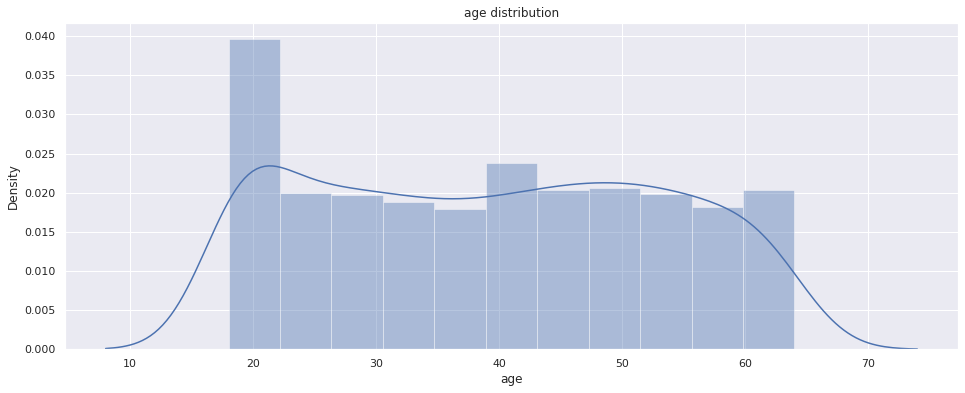

In [17]:
sns.set()
plt.figure(figsize=[16,6])
sns.distplot(insurance_datasheet['age'])
plt.title('age distribution')
plt.show()


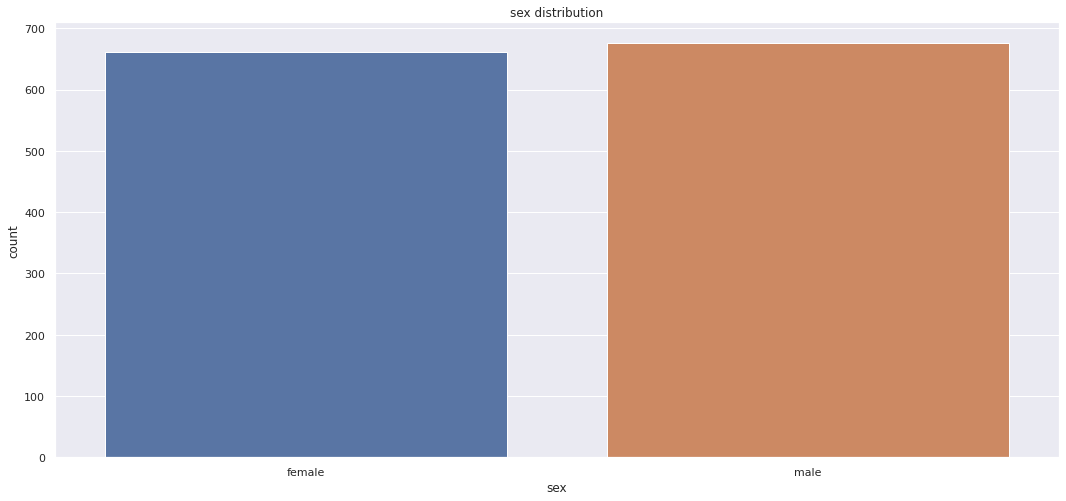

In [18]:
plt.figure(figsize=(18,8))
sns.countplot(x='sex',data=insurance_datasheet)
plt.title('sex distribution')
plt.show()

In [19]:
insurance_datasheet['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

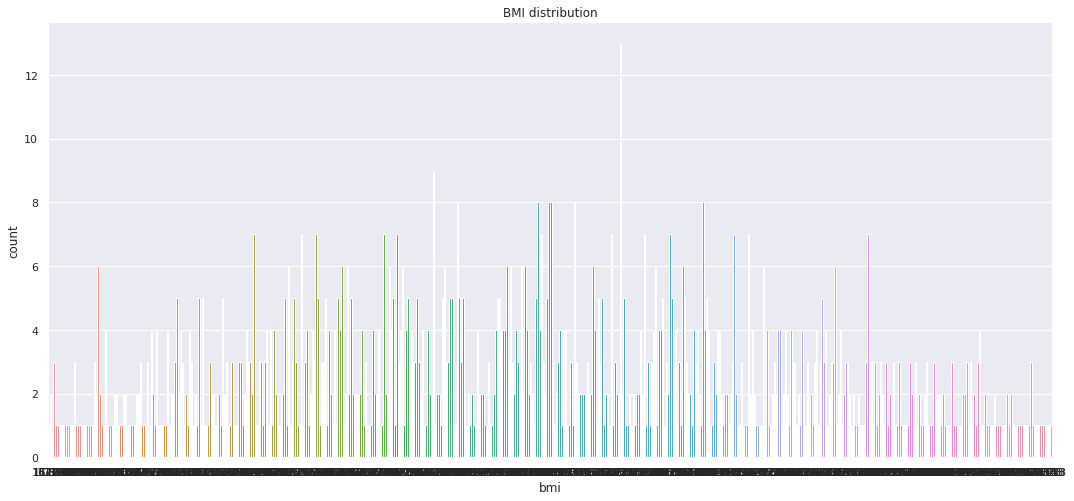

In [20]:
plt.figure(figsize=(18,8))
sns.countplot(x='bmi',data=insurance_datasheet)
plt.title('BMI distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


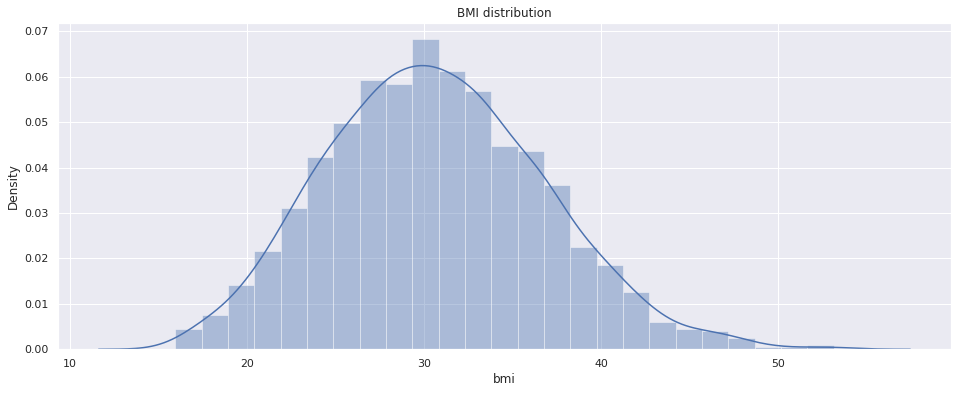

In [21]:
plt.figure(figsize=[16,6])
sns.distplot(insurance_datasheet['bmi'])
plt.title('BMI distribution')
plt.show()

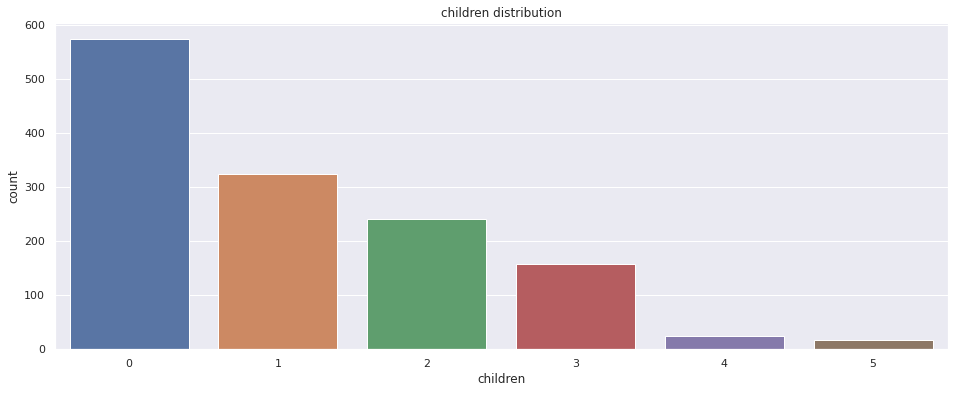

In [22]:
sns.set()
plt.figure(figsize=(16,6))
sns.countplot(x='children', data=insurance_datasheet)
plt.title('children distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


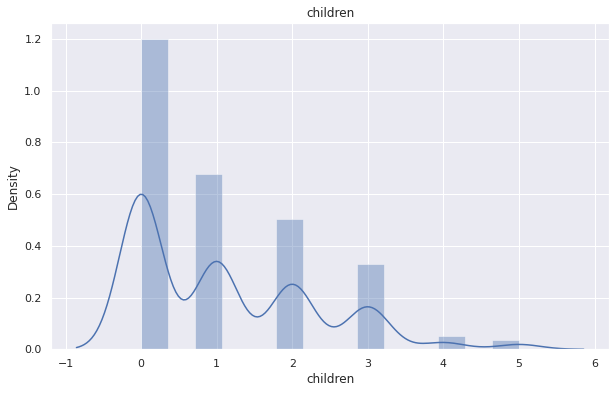

In [23]:
sns.set()
plt.figure(figsize=(10,6))
sns.distplot(insurance_datasheet['children'])
plt.title('children')
plt.show()

In [24]:
insurance_datasheet['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


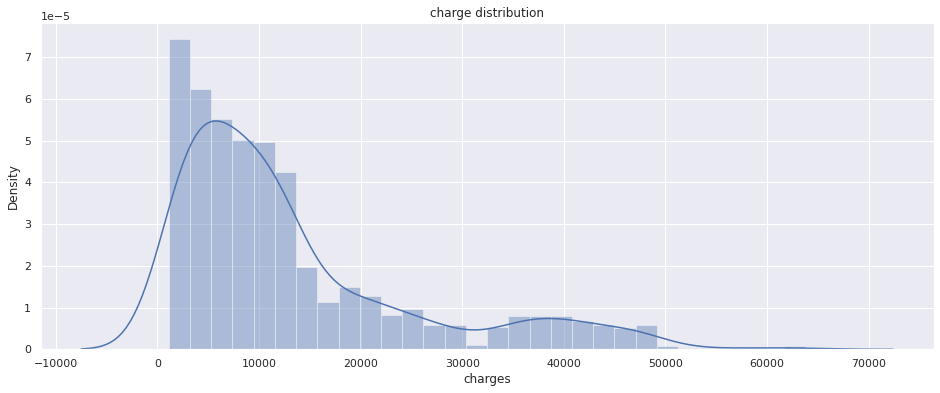

In [25]:
plt.figure(figsize=(16,6))
sns.distplot(insurance_datasheet['charges'])
plt.title('charge distribution')
plt.show()

In [26]:
# data pre-prossesing
##**encoding the categorical features**

In [27]:
insurance_datasheet.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_datasheet.replace({'smoker':{'yes':1, 'no': 0}},inplace=True)
insurance_datasheet.replace({'region':{'northeast':0,'northwest':1,'southeast':2,'southwest':3}},inplace=True)
insurance_datasheet.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [28]:
x = insurance_datasheet.drop(columns='charges', axis=1)
y = insurance_datasheet['charges']
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       3
1      18    0  33.770         1       0       2
2      28    0  33.000         3       0       2
3      33    0  22.705         0       0       1
4      32    0  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       1
1334   18    1  31.920         0       0       0
1335   18    1  36.850         0       0       2
1336   21    1  25.800         0       0       3
1337   61    1  29.070         0       1       1

[1338 rows x 6 columns]


In [29]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2, random_state=2)
print(x.shape,x_test.shape,x_train.shape)

(1338, 6) (1071, 6) (267, 6)


In [34]:
#importing the Linear Regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

**model evaaluation**

In [37]:

training_data_prediction = regressor.predict(x_train)

# R Square value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R Squared value :', r2_train)


R Squared value : 0.7043663613576312


In [41]:
#predicton on test data
test_data_prediction = regressor.predict(x_test)



In [43]:
# R Square value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R Squared value :', r2_test)

R Squared value : 0.743458309230281


buiding a predictive system

In [46]:
input_data = (31,1,25,74,0,1)

#checking input data as a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaped the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)
print('the insurance cost in USD is', prediction[0])


[39071.88656041]
the insurance cost in USD is 39071.8865604069


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
